In [1]:
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import skimage.io
import numpy as np

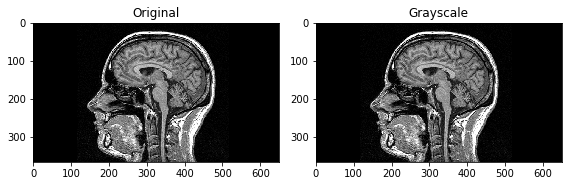

In [3]:
#image: https://live.staticflickr.com/2456/3854685038_48bc4c8b02_z.jpgpng
data=skimage.io.imread("MRI_blackandwhite.png")
#split original and greyscale
original = data
grayscale = rgb2gray(original)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

In [5]:
image_gray= grayscale.reshape(grayscale.shape[0] * grayscale.shape[1], 1)

In [6]:
image_gray.shape

(238550, 1)

In [8]:
from sklearn.cluster import KMeans
n=6
kmeans = KMeans(n_clusters=n, random_state=0).fit(image_gray)
clustered = kmeans.cluster_centers_[kmeans.labels_]

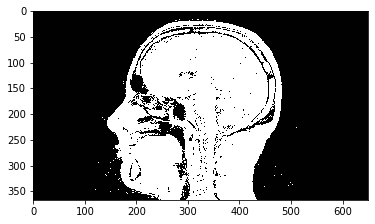

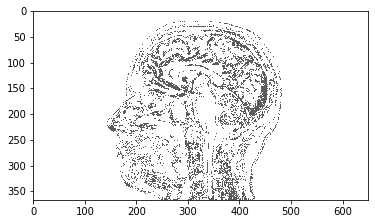

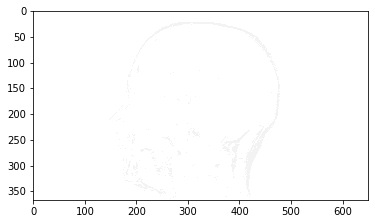

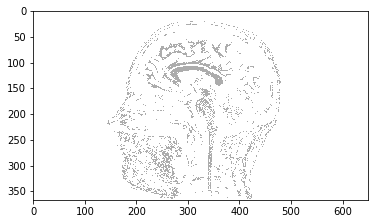

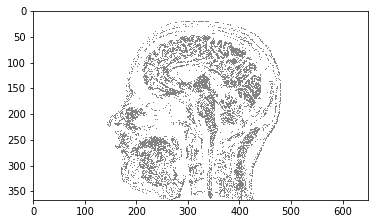

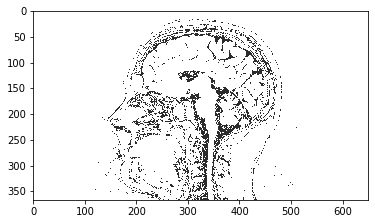

In [9]:
labels = kmeans.labels_
for n in range(n):
    image_cluster = []
    for i in range(len(labels)):
        if(labels[i]) == n:
            image_cluster.append(float(clustered[i]))
        else:
            image_cluster.append(1)
    if(n==1):
        image_fix= np.array(image_cluster).reshape(grayscale.shape)
    reshape_clustered = np.array(image_cluster).reshape(grayscale.shape)
    plt.imshow(reshape_clustered, cmap=plt.get_cmap("gray"),vmin=0, vmax=1)
    plt.show()